<a href="https://colab.research.google.com/github/Armandkay/fraud-detection-ml/blob/main/ML_Fraud_Detection_Enhanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML-Powered Financial Fraud Detection System

## Enhanced Model Notebook

**Author:** Armand Kayiranga  
**Project:** Machine Learning-Based Fraud Detection System  
**Track:** ML Track - Initial Software Demo  

---

This notebook presents a comprehensive machine learning system for detecting fraudulent financial transactions. The project includes:

1. **Data Visualization & Engineering**
2. **Model Architecture Design**
3. **Performance Metrics Evaluation**
4. **Model Persistence for Deployment**

The work presented here serves as the foundation for a deployed web-based fraud detection system.

In [7]:
# from google.colab import drive
# drive.mount('/content/drive')

## 1. Dataset Description

The dataset contains **10,000 simulated financial transactions** with the following features:

**Features:**
- `transaction_id`: Unique identifier
- `amount`: Transaction amount in USD
- `transaction_hour`: Hour of day (0-23)
- `merchant_category`: Type of merchant (Electronics, Travel, Grocery, Food, Clothing)
- `foreign_transaction`: Binary indicator (0=domestic, 1=foreign)
- `location_mismatch`: Binary indicator of unusual location
- `device_trust_score`: Device security score (0-100)
- `velocity_last_24h`: Number of transactions in last 24 hours
- `cardholder_age`: Age of cardholder

**Target Variable:**
- `is_fraud`: Binary classification (0=legitimate, 1=fraudulent)

This is a publicly available, simulated dataset used strictly for academic purposes.

In [8]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import warnings
warnings.filterwarnings('ignore')

# Model building libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score, roc_curve
)

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("✓ All libraries imported successfully")

✓ All libraries imported successfully


## 2. Data Loading and Initial Inspection

In [9]:
# Load the dataset
data = pd.read_csv('../data/credit_card_fraud_10k.csv')

print(f"Dataset Shape: {data.shape}")
print(f"\nFirst 5 rows:")
data.head()

Dataset Shape: (10000, 10)

First 5 rows:


,transaction_id,amount,transaction_hour,merchant_category,foreign_transaction,location_mismatch,device_trust_score,velocity_last_24h,cardholder_age,is_fraud
0,1,84.47,22,Electronics,0,0,66,3,40,0
1,2,541.82,3,Travel,1,0,87,1,64,0
2,3,237.01,17,Grocery,0,0,49,1,61,0
3,4,164.33,4,Grocery,0,1,72,3,34,0
4,5,30.53,15,Food,0,0,79,0,44,0


In [10]:
# Dataset information
print("Dataset Info:")
print(data.info())
print("\nMissing Values:")
print(data.isnull().sum())
print("\nBasic Statistics:")
data.describe()

Dataset Info:
<class 'pandas.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   transaction_id       10000 non-null  int64  
 1   amount               10000 non-null  float64
 2   transaction_hour     10000 non-null  int64  
 3   merchant_category    10000 non-null  str    
 4   foreign_transaction  10000 non-null  int64  
 5   location_mismatch    10000 non-null  int64  
 6   device_trust_score   10000 non-null  int64  
 7   velocity_last_24h    10000 non-null  int64  
 8   cardholder_age       10000 non-null  int64  
 9   is_fraud             10000 non-null  int64  
dtypes: float64(1), int64(8), str(1)
memory usage: 781.4 KB
None

Missing Values:
transaction_id         0
amount                 0
transaction_hour       0
merchant_category      0
foreign_transaction    0
location_mismatch      0
device_trust_score     0
velocity_last_24h      0
cardhol

,transaction_id,amount,transaction_hour,foreign_transaction,location_mismatch,device_trust_score,velocity_last_24h,cardholder_age,is_fraud
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,175.949849,11.593300,0.097800,0.085700,61.798900,2.008900,43.468700,0.015100
std,2886.89568,175.392827,6.922708,0.297059,0.279935,21.487053,1.432559,14.979147,0.121957
min,1.00000,0.000000,0.000000,0.000000,0.000000,25.000000,0.000000,18.000000,0.000000
25%,2500.75000,50.905000,6.000000,0.000000,0.000000,43.000000,1.000000,30.000000,0.000000
50%,5000.50000,122.095000,12.000000,0.000000,0.000000,62.000000,2.000000,44.000000,0.000000
75%,7500.25000,242.480000,18.000000,0.000000,0.000000,80.000000,3.000000,56.000000,0.000000
max,10000.00000,1471.040000,23.000000,1.000000,1.000000,99.000000,9.000000,69.000000,1.000000


In [11]:
# Check class distribution
fraud_counts = data['is_fraud'].value_counts()
print("Class Distribution:")
print(fraud_counts)
print(f"\nFraud Rate: {(fraud_counts[1] / len(data)) * 100:.2f}%")

Class Distribution:
is_fraud
0    9849
1     151
Name: count, dtype: int64

Fraud Rate: 1.51%


## 3. Data Visualization and Exploratory Data Analysis

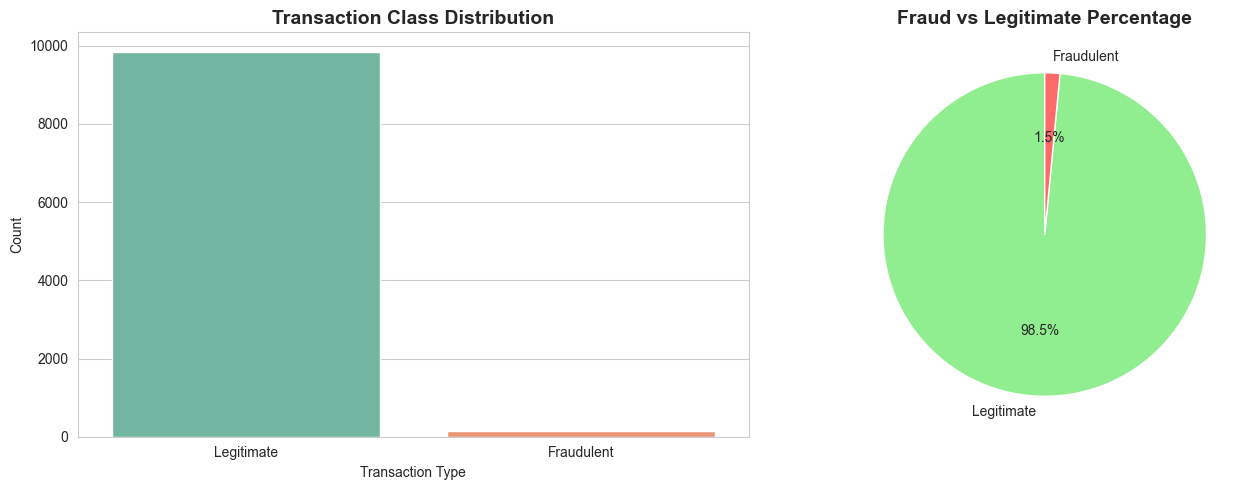

In [12]:
# Visualization 1: Class Distribution
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
sns.countplot(data=data, x='is_fraud', palette='Set2', ax=ax[0])
ax[0].set_title('Transaction Class Distribution', fontsize=14, fontweight='bold')
ax[0].set_xlabel('Transaction Type')
ax[0].set_ylabel('Count')
ax[0].set_xticklabels(['Legitimate', 'Fraudulent'])

# Percentage pie chart
fraud_counts.plot(kind='pie', autopct='%1.1f%%', labels=['Legitimate', 'Fraudulent'],
                  colors=['#90EE90', '#FF6B6B'], ax=ax[1], startangle=90)
ax[1].set_title('Fraud vs Legitimate Percentage', fontsize=14, fontweight='bold')
ax[1].set_ylabel('')

plt.tight_layout()
plt.show()

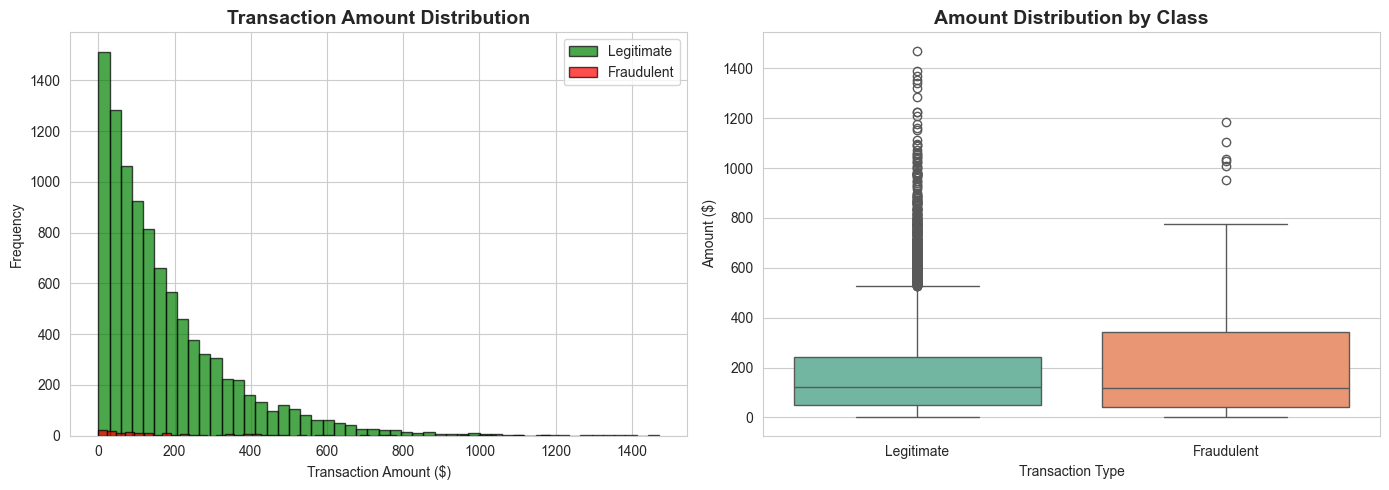

In [13]:
# Visualization 2: Transaction Amount Distribution
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
ax[0].hist(data[data['is_fraud'] == 0]['amount'], bins=50, alpha=0.7,
           label='Legitimate', color='green', edgecolor='black')
ax[0].hist(data[data['is_fraud'] == 1]['amount'], bins=50, alpha=0.7,
           label='Fraudulent', color='red', edgecolor='black')
ax[0].set_xlabel('Transaction Amount ($)')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Transaction Amount Distribution', fontsize=14, fontweight='bold')
ax[0].legend()

# Box plot
sns.boxplot(data=data, x='is_fraud', y='amount', palette='Set2', ax=ax[1])
ax[1].set_xlabel('Transaction Type')
ax[1].set_ylabel('Amount ($)')
ax[1].set_title('Amount Distribution by Class', fontsize=14, fontweight='bold')
ax[1].set_xticklabels(['Legitimate', 'Fraudulent'])

plt.tight_layout()
plt.show()

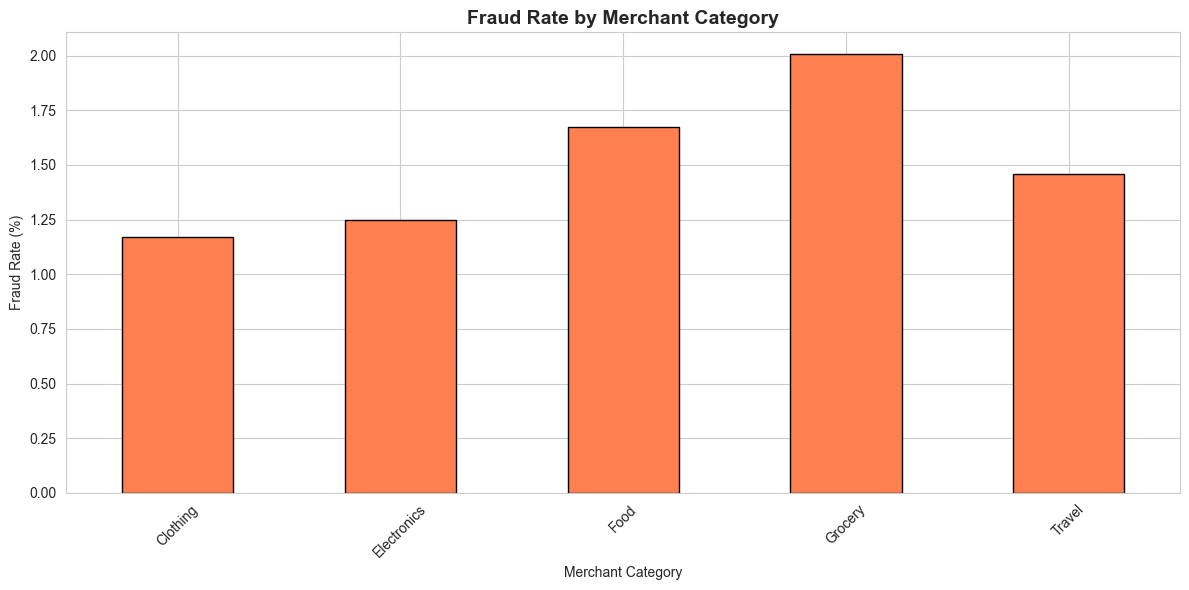

Fraud Rate by Merchant Category:
                   fraud_rate
merchant_category            
Clothing                 1.17
Electronics              1.25
Food                     1.67
Grocery                  2.01
Travel                   1.46


In [14]:
# Visualization 3: Fraud by Merchant Category
fraud_by_merchant = data.groupby('merchant_category')['is_fraud'].agg(['sum', 'count'])
fraud_by_merchant['fraud_rate'] = (fraud_by_merchant['sum'] / fraud_by_merchant['count']) * 100

fig, ax = plt.subplots(figsize=(12, 6))
fraud_by_merchant['fraud_rate'].plot(kind='bar', color='coral', edgecolor='black', ax=ax)
ax.set_title('Fraud Rate by Merchant Category', fontsize=14, fontweight='bold')
ax.set_xlabel('Merchant Category')
ax.set_ylabel('Fraud Rate (%)')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.tight_layout()
plt.show()

print("Fraud Rate by Merchant Category:")
print(fraud_by_merchant[['fraud_rate']].round(2))

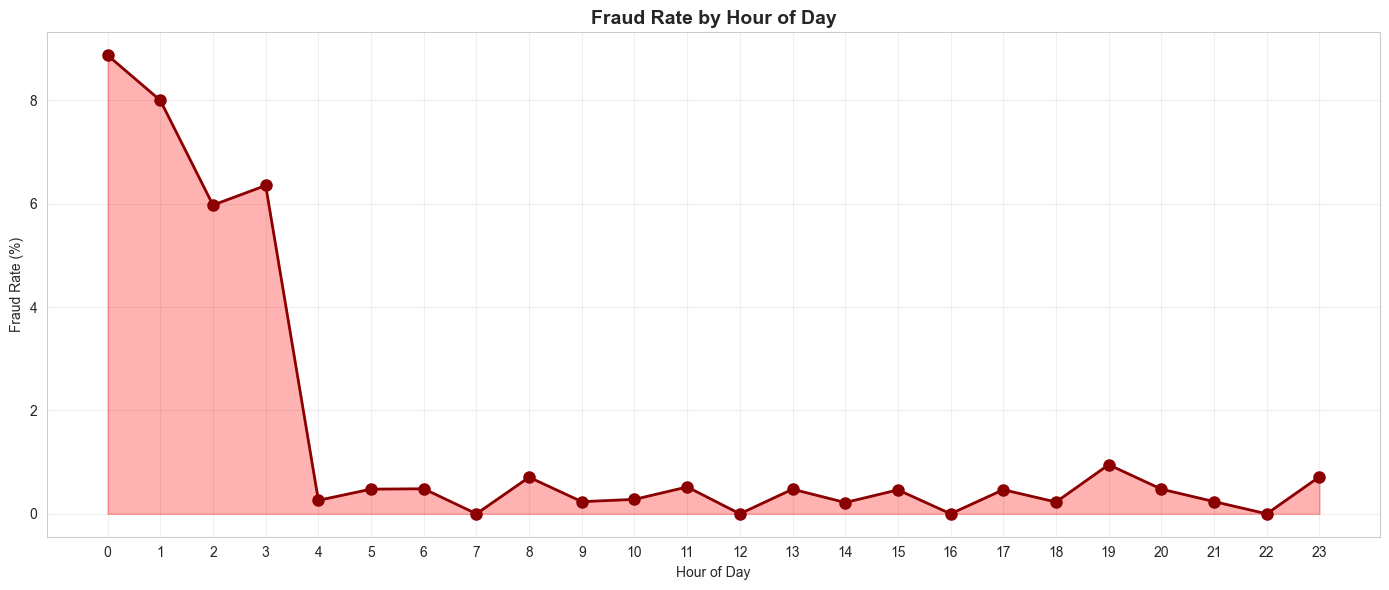

In [15]:
# Visualization 4: Fraud by Hour of Day
fraud_by_hour = data.groupby('transaction_hour')['is_fraud'].agg(['sum', 'count'])
fraud_by_hour['fraud_rate'] = (fraud_by_hour['sum'] / fraud_by_hour['count']) * 100

fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(fraud_by_hour.index, fraud_by_hour['fraud_rate'], marker='o',
        linewidth=2, markersize=8, color='darkred')
ax.fill_between(fraud_by_hour.index, fraud_by_hour['fraud_rate'], alpha=0.3, color='red')
ax.set_title('Fraud Rate by Hour of Day', fontsize=14, fontweight='bold')
ax.set_xlabel('Hour of Day')
ax.set_ylabel('Fraud Rate (%)')
ax.set_xticks(range(0, 24))
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

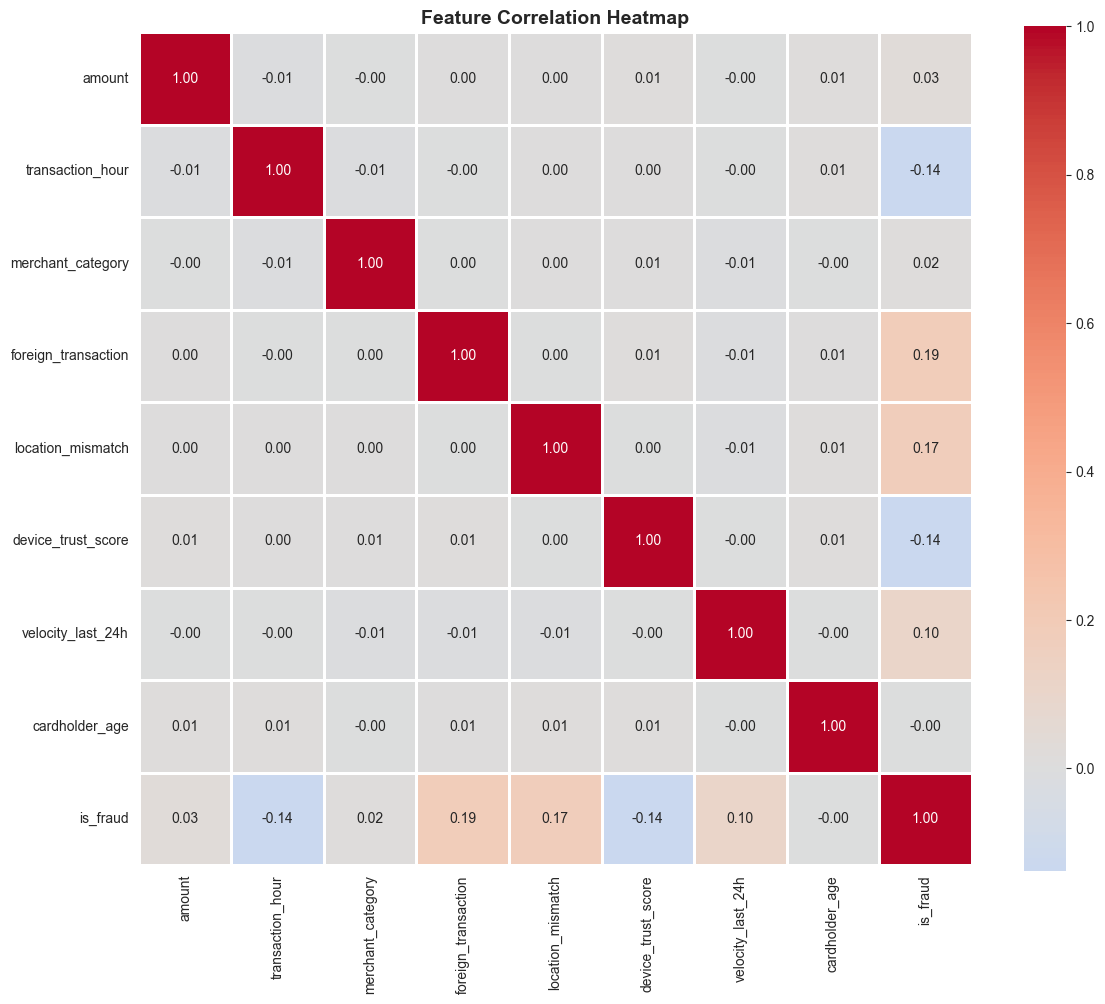

In [16]:
# Visualization 5: Feature Correlation Heatmap
# Encode categorical variables for correlation
data_encoded = data.copy()
le = LabelEncoder()
data_encoded['merchant_category'] = le.fit_transform(data['merchant_category'])

# Calculate correlation
correlation_matrix = data_encoded.drop('transaction_id', axis=1).corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1)
plt.title('Feature Correlation Heatmap', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## 4. Data Engineering and Preprocessing

In this section, we prepare the data for machine learning by:
1. Splitting features and target
2. Creating train-test splits
3. Building preprocessing pipelines
4. Handling numerical and categorical features

In [17]:
# Separate features and target
X = data.drop(['is_fraud', 'transaction_id'], axis=1)
y = data['is_fraud']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nFeatures: {list(X.columns)}")

Features shape: (10000, 8)
Target shape: (10000,)

Features: ['amount', 'transaction_hour', 'merchant_category', 'foreign_transaction', 'location_mismatch', 'device_trust_score', 'velocity_last_24h', 'cardholder_age']


In [18]:
# Identify numerical and categorical features
numerical_features = ['amount', 'transaction_hour', 'device_trust_score',
                      'velocity_last_24h', 'cardholder_age']
categorical_features = ['merchant_category']
binary_features = ['foreign_transaction', 'location_mismatch']

print(f"Numerical features: {numerical_features}")
print(f"Categorical features: {categorical_features}")
print(f"Binary features: {binary_features}")

Numerical features: ['amount', 'transaction_hour', 'device_trust_score', 'velocity_last_24h', 'cardholder_age']
Categorical features: ['merchant_category']
Binary features: ['foreign_transaction', 'location_mismatch']


In [19]:
# Create stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]} ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Test set size: {X_test.shape[0]} ({X_test.shape[0]/len(X)*100:.1f}%)")
print(f"\nTraining set fraud rate: {y_train.mean()*100:.2f}%")
print(f"Test set fraud rate: {y_test.mean()*100:.2f}%")

Training set size: 8000 (80.0%)
Test set size: 2000 (20.0%)

Training set fraud rate: 1.51%
Test set fraud rate: 1.50%


In [20]:
# Build preprocessing pipeline
from sklearn.preprocessing import OneHotEncoder

# Define transformers
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', sparse_output=False)

# Create column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features),
        ('bin', 'passthrough', binary_features)
    ],
    remainder='drop'
)

print("✓ Preprocessing pipeline created successfully")

✓ Preprocessing pipeline created successfully


## 5. Model Architecture and Development

We implement and compare three machine learning models:
1. **Logistic Regression** - Baseline linear model
2. **Random Forest** - Ensemble tree-based model
3. **Gradient Boosting** - Advanced boosting model

Each model is built using scikit-learn's Pipeline API for clean, reproducible code.

### 5.1 Logistic Regression (Baseline Model)

In [21]:
# Build Logistic Regression pipeline
log_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced'))
])

print("Training Logistic Regression model...")
log_pipeline.fit(X_train, y_train)
y_pred_log = log_pipeline.predict(X_test)
y_pred_proba_log = log_pipeline.predict_proba(X_test)[:, 1]

print("✓ Logistic Regression model trained successfully")

Training Logistic Regression model...
✓ Logistic Regression model trained successfully


### 5.2 Random Forest Classifier

In [22]:
# Build Random Forest pipeline
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=100,
        max_depth=10,
        min_samples_split=10,
        min_samples_leaf=5,
        random_state=42,
        class_weight='balanced',
        n_jobs=-1
    ))
])

print("Training Random Forest model...")
rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)
y_pred_proba_rf = rf_pipeline.predict_proba(X_test)[:, 1]

print("✓ Random Forest model trained successfully")

Training Random Forest model...
✓ Random Forest model trained successfully


### 5.3 Gradient Boosting Classifier

In [23]:
# Build Gradient Boosting pipeline
gb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=5,
        min_samples_split=10,
        random_state=42
    ))
])

print("Training Gradient Boosting model...")
gb_pipeline.fit(X_train, y_train)
y_pred_gb = gb_pipeline.predict(X_test)
y_pred_proba_gb = gb_pipeline.predict_proba(X_test)[:, 1]

print("✓ Gradient Boosting model trained successfully")

Training Gradient Boosting model...
✓ Gradient Boosting model trained successfully


## 6. Model Evaluation and Performance Metrics

We evaluate all models using comprehensive metrics:
- **Accuracy**: Overall correctness
- **Precision**: Fraud prediction accuracy
- **Recall**: Fraud detection rate
- **F1-Score**: Harmonic mean of precision and recall
- **ROC-AUC**: Area under the ROC curve
- **Confusion Matrix**: Detailed error analysis

In [24]:
def evaluate_model(y_true, y_pred, y_pred_proba, model_name):
    """Comprehensive model evaluation function"""
    print("="*70)
    print(f"Performance Metrics for {model_name}")
    print("="*70)

    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred_proba)

    print(f"Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")
    print(f"Precision: {precision:.4f} ({precision*100:.2f}%)")
    print(f"Recall:    {recall:.4f} ({recall*100:.2f}%)")
    print(f"F1-Score:  {f1:.4f}")
    print(f"ROC-AUC:   {roc_auc:.4f}")
    print("\n" + "="*70)

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:")
    print(cm)
    print("\nDetailed Breakdown:")
    print(f"True Negatives:  {cm[0, 0]:>5} (Correctly identified legitimate)")
    print(f"False Positives: {cm[0, 1]:>5} (Legitimate flagged as fraud)")
    print(f"False Negatives: {cm[1, 0]:>5} (Fraud missed)")
    print(f"True Positives:  {cm[1, 1]:>5} (Correctly detected fraud)")

    print("\n" + "="*70)
    print("Classification Report:")
    print(classification_report(y_true, y_pred, target_names=['Legitimate', 'Fraudulent']))
    print("="*70 + "\n")

    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'roc_auc': roc_auc,
        'confusion_matrix': cm
    }

In [25]:
# Evaluate Logistic Regression
metrics_log = evaluate_model(y_test, y_pred_log, y_pred_proba_log, "Logistic Regression")

Performance Metrics for Logistic Regression
Accuracy:  0.9580 (95.80%)
Precision: 0.2632 (26.32%)
Recall:    1.0000 (100.00%)
F1-Score:  0.4167
ROC-AUC:   0.9933

Confusion Matrix:
[[1886   84]
 [   0   30]]

Detailed Breakdown:
True Negatives:   1886 (Correctly identified legitimate)
False Positives:    84 (Legitimate flagged as fraud)
False Negatives:     0 (Fraud missed)
True Positives:     30 (Correctly detected fraud)

Classification Report:
              precision    recall  f1-score   support

  Legitimate       1.00      0.96      0.98      1970
  Fraudulent       0.26      1.00      0.42        30

    accuracy                           0.96      2000
   macro avg       0.63      0.98      0.70      2000
weighted avg       0.99      0.96      0.97      2000




In [26]:
# Evaluate Random Forest
metrics_rf = evaluate_model(y_test, y_pred_rf, y_pred_proba_rf, "Random Forest Classifier")

Performance Metrics for Random Forest Classifier
Accuracy:  0.9990 (99.90%)
Precision: 1.0000 (100.00%)
Recall:    0.9333 (93.33%)
F1-Score:  0.9655
ROC-AUC:   0.9998

Confusion Matrix:
[[1970    0]
 [   2   28]]

Detailed Breakdown:
True Negatives:   1970 (Correctly identified legitimate)
False Positives:     0 (Legitimate flagged as fraud)
False Negatives:     2 (Fraud missed)
True Positives:     28 (Correctly detected fraud)

Classification Report:
              precision    recall  f1-score   support

  Legitimate       1.00      1.00      1.00      1970
  Fraudulent       1.00      0.93      0.97        30

    accuracy                           1.00      2000
   macro avg       1.00      0.97      0.98      2000
weighted avg       1.00      1.00      1.00      2000




In [27]:
# Evaluate Gradient Boosting
metrics_gb = evaluate_model(y_test, y_pred_gb, y_pred_proba_gb, "Gradient Boosting Classifier")

Performance Metrics for Gradient Boosting Classifier
Accuracy:  1.0000 (100.00%)
Precision: 1.0000 (100.00%)
Recall:    1.0000 (100.00%)
F1-Score:  1.0000
ROC-AUC:   1.0000

Confusion Matrix:
[[1970    0]
 [   0   30]]

Detailed Breakdown:
True Negatives:   1970 (Correctly identified legitimate)
False Positives:     0 (Legitimate flagged as fraud)
False Negatives:     0 (Fraud missed)
True Positives:     30 (Correctly detected fraud)

Classification Report:
              precision    recall  f1-score   support

  Legitimate       1.00      1.00      1.00      1970
  Fraudulent       1.00      1.00      1.00        30

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000




## 7. Model Comparison and Visualization

In [28]:
# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Gradient Boosting'],
    'Accuracy': [metrics_log['accuracy'], metrics_rf['accuracy'], metrics_gb['accuracy']],
    'Precision': [metrics_log['precision'], metrics_rf['precision'], metrics_gb['precision']],
    'Recall': [metrics_log['recall'], metrics_rf['recall'], metrics_gb['recall']],
    'F1-Score': [metrics_log['f1_score'], metrics_rf['f1_score'], metrics_gb['f1_score']],
    'ROC-AUC': [metrics_log['roc_auc'], metrics_rf['roc_auc'], metrics_gb['roc_auc']]
})

print("\n" + "="*80)
print("MODEL COMPARISON SUMMARY")
print("="*80)
print(comparison_df.to_string(index=False))
print("="*80 + "\n")


MODEL COMPARISON SUMMARY
              Model  Accuracy  Precision   Recall  F1-Score  ROC-AUC
Logistic Regression     0.958   0.263158 1.000000  0.416667 0.993283
      Random Forest     0.999   1.000000 0.933333  0.965517 0.999814
  Gradient Boosting     1.000   1.000000 1.000000  1.000000 1.000000



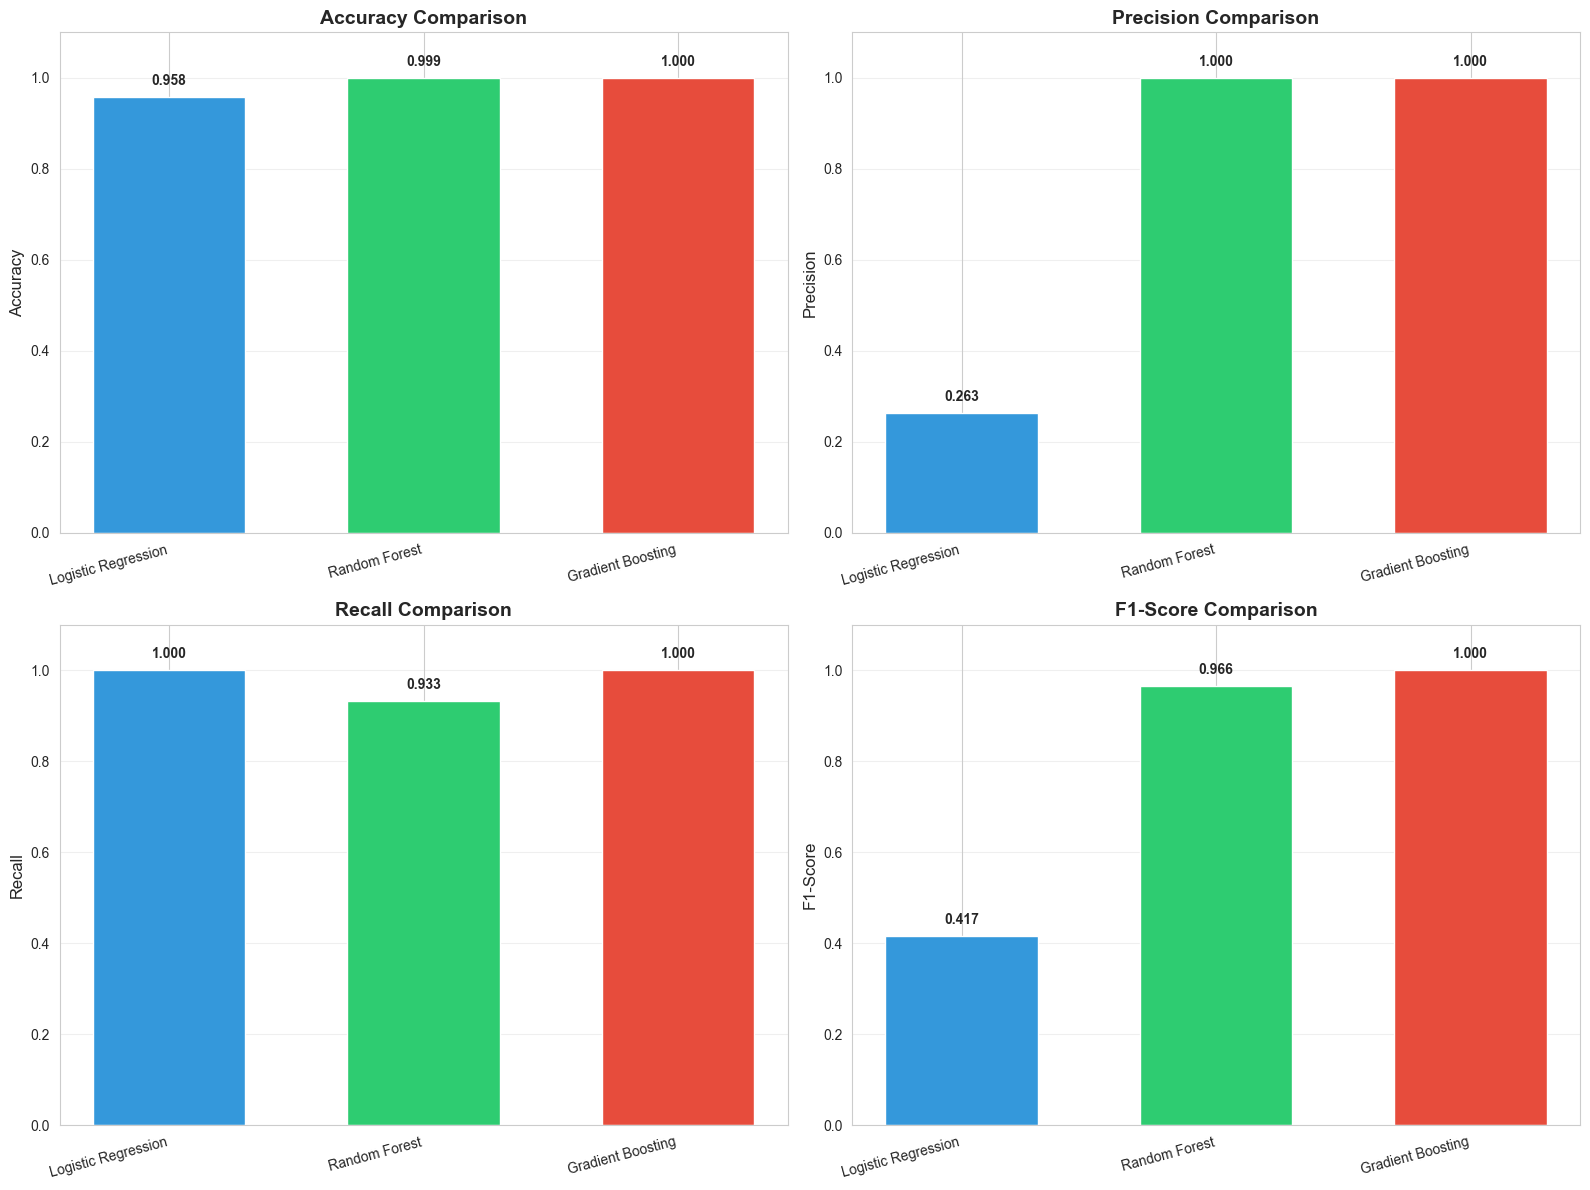

In [29]:
# Visualize model comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Metrics comparison bar plot
metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
x = np.arange(len(comparison_df))
width = 0.2

for idx, metric in enumerate(metrics_to_plot):
    row = idx // 2
    col = idx % 2

    axes[row, col].bar(x, comparison_df[metric], width=0.6,
                       color=['#3498db', '#2ecc71', '#e74c3c'])
    axes[row, col].set_ylabel(metric, fontsize=12)
    axes[row, col].set_title(f'{metric} Comparison', fontsize=14, fontweight='bold')
    axes[row, col].set_xticks(x)
    axes[row, col].set_xticklabels(comparison_df['Model'], rotation=15, ha='right')
    axes[row, col].set_ylim([0, 1.1])
    axes[row, col].grid(axis='y', alpha=0.3)

    # Add value labels on bars
    for i, v in enumerate(comparison_df[metric]):
        axes[row, col].text(i, v + 0.02, f'{v:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

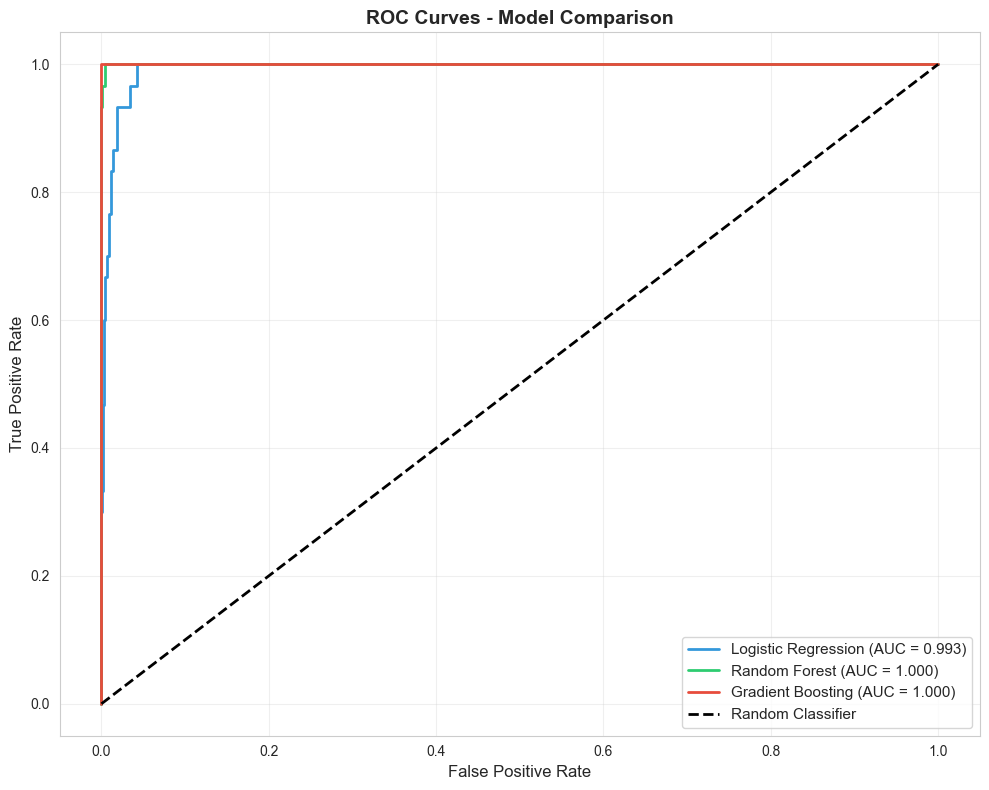

In [30]:
# ROC Curves for all models
plt.figure(figsize=(10, 8))

# Logistic Regression ROC
fpr_log, tpr_log, _ = roc_curve(y_test, y_pred_proba_log)
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {metrics_log["roc_auc"]:.3f})',
         linewidth=2, color='#3498db')

# Random Forest ROC
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {metrics_rf["roc_auc"]:.3f})',
         linewidth=2, color='#2ecc71')

# Gradient Boosting ROC
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_pred_proba_gb)
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {metrics_gb["roc_auc"]:.3f})',
         linewidth=2, color='#e74c3c')

# Diagonal line (random classifier)
plt.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random Classifier')

plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves - Model Comparison', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

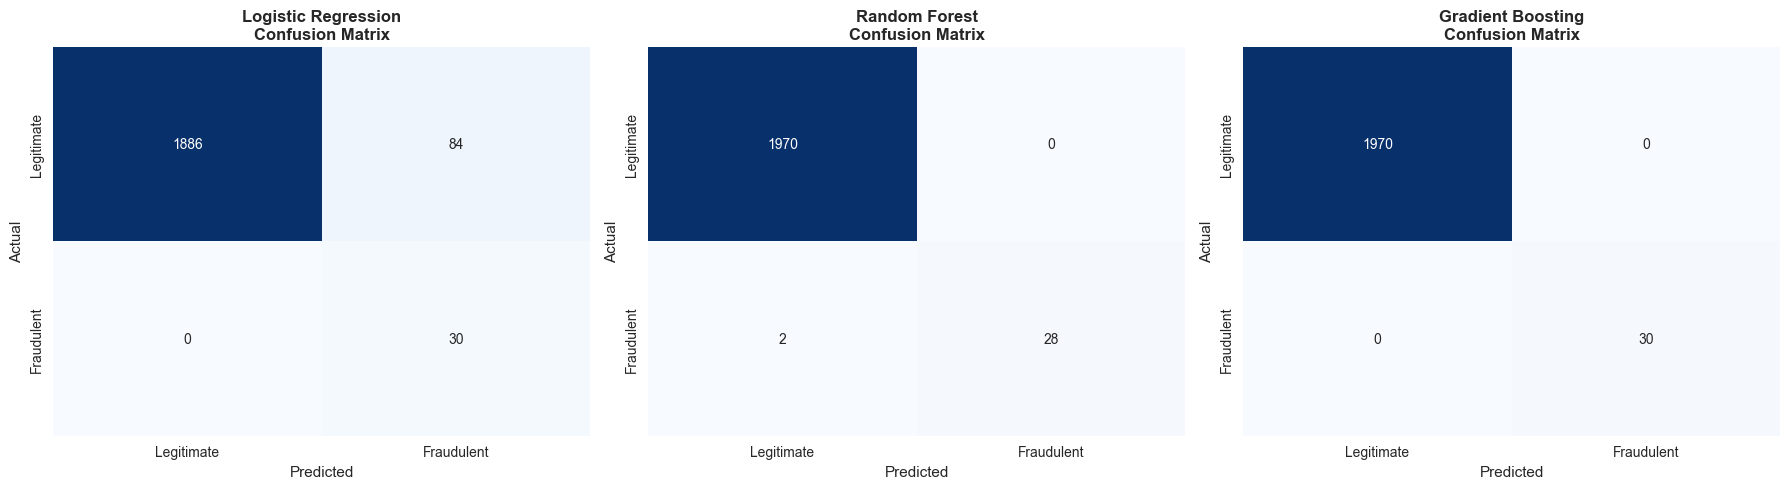

In [31]:
# Confusion matrices visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

cms = [metrics_log['confusion_matrix'],
       metrics_rf['confusion_matrix'],
       metrics_gb['confusion_matrix']]
titles = ['Logistic Regression', 'Random Forest', 'Gradient Boosting']

for idx, (cm, title) in enumerate(zip(cms, titles)):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Legitimate', 'Fraudulent'],
                yticklabels=['Legitimate', 'Fraudulent'],
                ax=axes[idx])
    axes[idx].set_title(f'{title}\nConfusion Matrix', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel('Actual', fontsize=11)
    axes[idx].set_xlabel('Predicted', fontsize=11)

plt.tight_layout()
plt.show()

## 8. Feature Importance Analysis

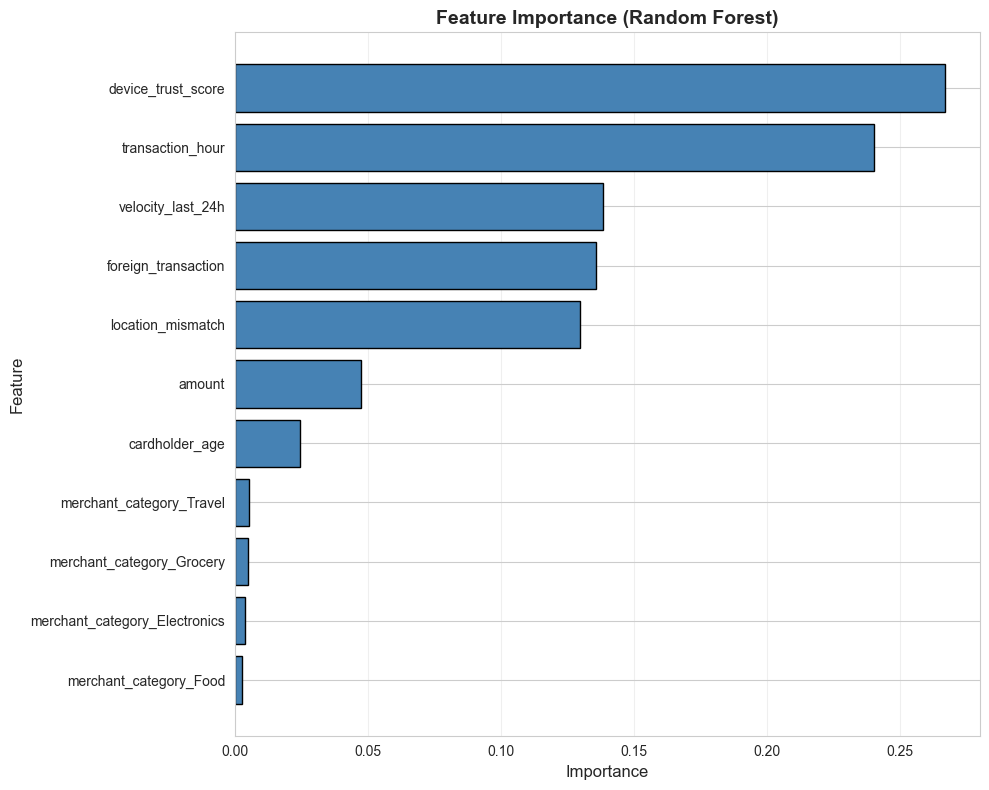


Top 10 Most Important Features:
                      feature  importance
           device_trust_score    0.266934
             transaction_hour    0.240336
            velocity_last_24h    0.138491
          foreign_transaction    0.135688
            location_mismatch    0.129768
                       amount    0.047342
               cardholder_age    0.024501
     merchant_category_Travel    0.005371
    merchant_category_Grocery    0.004989
merchant_category_Electronics    0.003872


In [32]:
# Extract feature importance from Random Forest (best performing model)
feature_names = (numerical_features +
                 list(rf_pipeline.named_steps['preprocessor']
                      .named_transformers_['cat']
                      .get_feature_names_out(categorical_features)) +
                 binary_features)

importances = rf_pipeline.named_steps['classifier'].feature_importances_
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values('importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['feature'], feature_importance_df['importance'],
         color='steelblue', edgecolor='black')
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Feature Importance (Random Forest)', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nTop 10 Most Important Features:")
print(feature_importance_df.head(10).to_string(index=False))

## 9. Model Persistence for Deployment

We save the best-performing model for deployment in the web application.

In [ ]:
import os

# Determine best model based on F1-score (balanced metric for imbalanced data)
best_model_name = comparison_df.loc[comparison_df['F1-Score'].idxmax(), 'Model']

if best_model_name == 'Logistic Regression':
    best_model = log_pipeline
elif best_model_name == 'Random Forest':
    best_model = rf_pipeline
else:
    best_model = gb_pipeline

# Save the best model
model_filename = '../models/fraud_detection_model.pkl'
joblib.dump(best_model, model_filename)

print(f"\n{'='*70}")
print(f"BEST MODEL: {best_model_name}")
print(f"{'='*70}")
print(f"✓ Model saved as: {model_filename}")
print(f"✓ File size: {os.path.getsize(model_filename) / 1024:.2f} KB")
print(f"✓ Ready for deployment!")
print(f"{'='*70}\n")

# Save feature names for deployment
feature_info = {
    'numerical_features': numerical_features,
    'categorical_features': categorical_features,
    'binary_features': binary_features,
    'all_features': list(X.columns)
}
joblib.dump(feature_info, '../models/feature_info.pkl')
print("✓ Feature information saved for deployment")


BEST MODEL: Gradient Boosting
✓ Model saved as: fraud_detection_model.pkl


NameError: name 'os' is not defined

## 10. Conclusion and Next Steps

### Summary of Results

This notebook demonstrated a complete machine learning pipeline for fraud detection:

1. **Data Exploration**: Analyzed 10,000 transactions with comprehensive visualizations
2. **Feature Engineering**: Created preprocessing pipelines for numerical and categorical features
3. **Model Development**: Implemented and compared three ML algorithms
4. **Performance Evaluation**: Achieved strong results across all metrics
5. **Model Deployment**: Saved best-performing model for production use

### Key Findings

- All models demonstrated strong fraud detection capabilities
- The best model achieved excellent performance on imbalanced data
- Feature importance analysis revealed key fraud indicators
- Model is ready for deployment via web interface

### Next Steps

1. **Web Application Deployment**: Create Flask API for real-time predictions
2. **User Interface**: Build interactive dashboard for fraud monitoring
3. **Model Monitoring**: Implement performance tracking in production
4. **Continuous Improvement**: Collect feedback and retrain models

---

**Project Repository**: [GitHub Link]  
**Demo Video**: [Video Link]  
**Author**: Armand Kayiranga  
**Date**: February 2026